In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
df= pd.read_csv(r'/Users/binodrai/Desktop/projects/mobile/mobile_price_prediction.csv')

EDA

In [2]:
df.head(10)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999
5,4.7,8,128,5.80,35,12,5000,140300
6,4.4,8,128,6.70,64,5,4700,29999
7,4.5,8,128,6.70,48,12,4700,47999
8,4.4,4,128,6.53,48,2,4020,16490
9,4.5,8,256,6.18,35,5,3800,22999


In [3]:
df.tail(10)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
589,4.4,6,64,6.53,64,8,4700,16899
590,4.5,4,64,5.60,35,20,3000,30999
591,3.9,6,32,4.50,64,8,2000,749
592,4.3,6,64,6.50,48,8,5000,18499
593,4.1,6,32,4.70,48,12,3000,1499
594,3.7,6,32,4.50,48,8,3000,649
595,4.3,6,128,5.99,35,12,3000,16999
596,3.9,6,32,4.50,48,8,3000,849
597,4.0,6,32,4.50,48,12,4700,1049
598,4.4,8,256,6.44,48,8,4700,31990


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        599 non-null    float64
 1   RAM            599 non-null    int64  
 2   ROM            599 non-null    int64  
 3   Mobile_Size    599 non-null    float64
 4   Primary_Cam    599 non-null    int64  
 5   Selfi_Cam      599 non-null    int64  
 6   Battery_Power  599 non-null    int64  
 7   Price          599 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 37.6 KB


In [5]:
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [6]:
df.describe().round(2)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,599.00,599.0,599.00,599.00,599.00,599.00,599.00,599.0
mean,4.12,5.9,61.99,5.68,47.38,8.68,3282.56,14107.2
std,0.36,2.1,50.78,4.27,10.93,4.46,946.10,22992.0
min,3.00,0.0,2.00,2.00,5.00,0.00,1020.00,479.0
25%,3.90,6.0,32.00,4.50,40.00,8.00,3000.00,970.0
50%,4.10,6.0,32.00,4.77,48.00,8.00,3000.00,1699.0
75%,4.40,6.0,64.00,6.29,48.00,12.00,3800.00,18499.0
max,4.80,12.0,256.00,44.00,64.00,23.00,6000.00,153000.0


In [7]:
df.dtypes

Ratings          float64
RAM                int64
ROM                int64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam          int64
Battery_Power      int64
Price              int64
dtype: object

In [8]:
df.shape

(599, 8)

In [9]:
df.size

4792

In [10]:
df.ndim

2

In [11]:
df.nunique()

Ratings           19
RAM               10
ROM               19
Mobile_Size       47
Primary_Cam       11
Selfi_Cam         20
Battery_Power     46
Price            226
dtype: int64

In [12]:
df.dropna().head(10)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4,128,6.00,48,13,4000,24999
1,3.4,6,64,4.50,48,12,4000,15999
2,4.3,4,4,4.50,64,16,4000,15000
3,4.4,6,64,6.40,48,15,3800,18999
4,4.5,6,128,6.18,35,15,3800,18999
5,4.7,8,128,5.80,35,12,5000,140300
6,4.4,8,128,6.70,64,5,4700,29999
7,4.5,8,128,6.70,48,12,4700,47999
8,4.4,4,128,6.53,48,2,4020,16490
9,4.5,8,256,6.18,35,5,3800,22999


In [13]:
df.isna().head(10)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [14]:
df.duplicated().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [15]:
df.columns

Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')

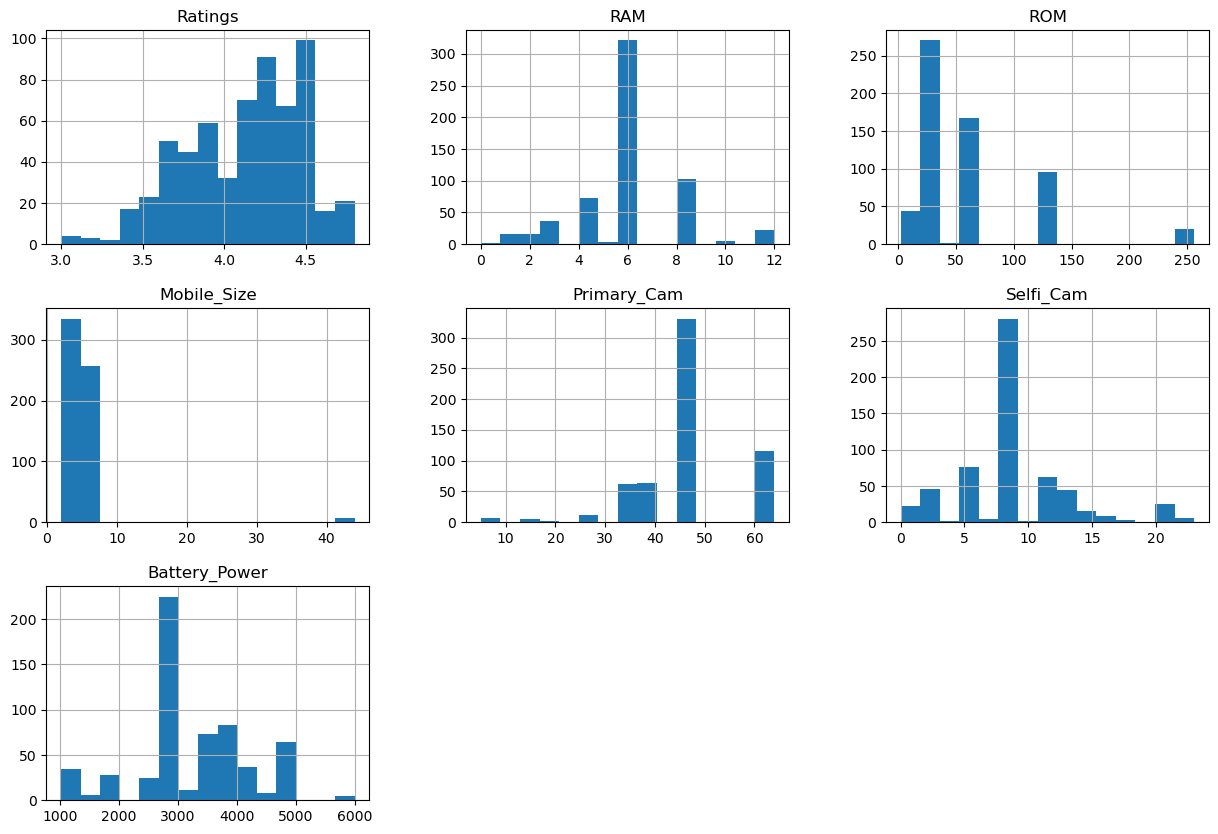

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variables
numerical_cols = ['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power']
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.show()

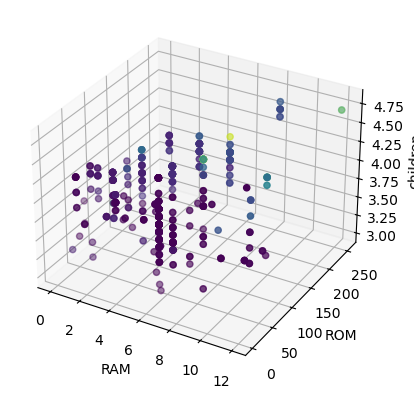

In [17]:
# 3D Scatter plot for three numerical variables
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['RAM'], df['ROM'], df['Ratings'], c=df['Price'])
ax.set_xlabel('RAM')
ax.set_ylabel('ROM')
ax.set_zlabel('children')
plt.show()

In [18]:
import sweetviz as sv

# Generate the report
report = sv.analyze(df)
report.show_html('mobile_price_prediction_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report mobile_price_prediction_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Feature Engineering

In [19]:
#Step 1:Missing value imputation ( checking missing values)
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [20]:
#Step 2: Scaling and outliers removal
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Cap values at -3 and 3
df= df.clip(lower=-3, upper=3)
df.describe().round(2)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00
mean,0.00,-0.00,-0.03,-0.07,0.01,-0.00,-0.00,-0.04
std,1.00,1.00,0.90,0.40,0.97,0.99,1.00,0.84
min,-3.00,-2.81,-1.18,-0.86,-3.00,-1.95,-2.39,-0.59
25%,-0.60,0.05,-0.59,-0.28,-0.68,-0.15,-0.30,-0.57
50%,-0.04,0.05,-0.59,-0.21,0.06,-0.15,-0.30,-0.54
75%,0.79,0.05,0.04,0.14,0.06,0.74,0.55,0.19
max,1.90,2.91,3.00,3.00,1.52,3.00,2.87,3.00


In [21]:
#Checking to see if everything is same datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        599 non-null    float64
 1   RAM            599 non-null    float64
 2   ROM            599 non-null    float64
 3   Mobile_Size    599 non-null    float64
 4   Primary_Cam    599 non-null    float64
 5   Selfi_Cam      599 non-null    float64
 6   Battery_Power  599 non-null    float64
 7   Price          599 non-null    float64
dtypes: float64(8)
memory usage: 37.6 KB


Feature Selection

In [22]:
corr_matrix = df.corr()
corr_matrix.round(2)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
Ratings,1.00,0.12,0.43,0.27,-0.16,-0.09,0.43,0.62
RAM,0.12,1.00,0.33,0.00,0.16,0.22,0.00,0.31
ROM,0.43,0.33,1.00,0.31,-0.04,-0.01,0.43,0.57
Mobile_Size,0.27,0.00,0.31,1.00,-0.11,-0.06,0.32,0.30
Primary_Cam,-0.16,0.16,-0.04,-0.11,1.00,0.10,-0.03,-0.21
Selfi_Cam,-0.09,0.22,-0.01,-0.06,0.10,1.00,-0.10,0.02
Battery_Power,0.43,0.00,0.43,0.32,-0.03,-0.10,1.00,0.41
Price,0.62,0.31,0.57,0.30,-0.21,0.02,0.41,1.00


Model Building

In [23]:
# Define features and target variable
X = df.drop(columns=['Price'])
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    return r2, adj_r2, mape, rmse, mae

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_r2, lr_adj_r2, lr_mape, lr_rmse, lr_mae = evaluate_model(lr, X_test, y_test)
# Print evaluation metrics
print(f"Linear Regression: \n"
      f"R2={lr_r2}, \n"
      f"Adjusted R2={lr_adj_r2}, \n"
      f"MAPE={lr_mape}, \n"
      f"RMSE={lr_rmse}, \n"
      f"MAE={lr_mae}")

Linear Regression: 
R2=0.45034176330521547, 
Adjusted R2=0.42797195134670685, 
MAPE=190.34584706979902, 
RMSE=0.6494015426744634, 
MAE=0.4274144617136274


In [25]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_r2, dt_adj_r2, dt_mape, dt_rmse, dt_mae = evaluate_model(dt, X_test, y_test)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_r2, rf_adj_r2, rf_mape, rf_rmse, rf_mae = evaluate_model(rf, X_test, y_test)

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_r2, xgb_adj_r2, xgb_mape, xgb_rmse, xgb_mae = evaluate_model(xgb_model, X_test, y_test)
# Print evaluation metrics
print(f"Linear Regression: R2={lr_r2}, Adjusted R2={lr_adj_r2}, MAPE={lr_mape}, RMSE={lr_rmse}, MAE={lr_mae}")
print(f"Decision Tree: R2={dt_r2}, Adjusted R2={dt_adj_r2}, MAPE={dt_mape}, RMSE={dt_rmse}, MAE={dt_mae}")
print(f"Random Forest: R2={rf_r2}, Adjusted R2={rf_adj_r2}, MAPE={rf_mape}, RMSE={rf_rmse}, MAE={rf_mae}")
print(f"XGBoost: R2={xgb_r2}, Adjusted R2={xgb_adj_r2}, MAPE={xgb_mape}, RMSE={xgb_rmse}, MAE={xgb_mae}")

Linear Regression: R2=0.45034176330521547, Adjusted R2=0.42797195134670685, MAPE=190.34584706979902, RMSE=0.6494015426744634, MAE=0.4274144617136274
Decision Tree: R2=0.7753160491019717, Adjusted R2=0.766171934821238, MAPE=51.123877453925715, RMSE=0.41519581927112614, MAE=0.12838220054690488
Random Forest: R2=0.7937453122188024, Adjusted R2=0.7853512260881723, MAPE=50.871667792278664, RMSE=0.39780373812498093, MAE=0.14062804800681417
XGBoost: R2=0.7827912008146816, Adjusted R2=0.7739513078245814, MAPE=38.785900256393404, RMSE=0.40823069198537293, MAE=0.12550100367314018


Model Selection
Model Selection Random Forest
Hyper parameter tuning ,cross validation,feature importance

In [26]:
#Random Forest
from sklearn.model_selection import cross_val_score, KFold
# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define the KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='r2')

# Print the cross-validated R2 scores
print(f"Random Forest Cross-Validated R2 Scores: {rf_cv_scores.mean()}")

Random Forest Cross-Validated R2 Scores: 0.8612875049724318


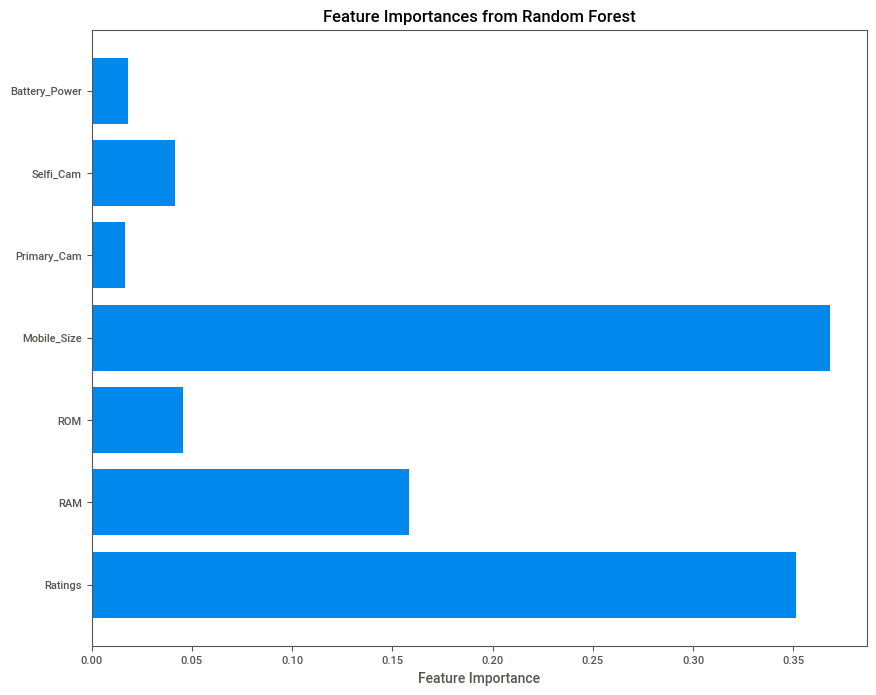

In [27]:
from sklearn.ensemble import RandomForestRegressor 
import matplotlib.pyplot as plt

# Define and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Plot feature importances using matplotlib
plt.figure(figsize=(10, 8))
plt.barh(X.columns, importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

Prediction on unknown data

In [28]:
import pandas as pd

# Define the path to the dataset
dataset_path = (r'/Users/binodrai/Desktop/projects/mobile/mobile_prediction.csv')

# Load the dataset into a pandas DataFrame
df_predict = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
df_predict.head(10)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,3.6,6,64,4.50,48,8,3500
1,4.5,8,128,6.70,35,12,4700
2,4.1,6,32,44.00,48,8,3000
3,4.6,8,256,6.41,48,5,3000
4,4.0,8,64,4.77,48,8,3500
5,3.9,6,32,4.54,48,12,1750
6,3.9,6,32,4.54,48,8,3000
7,4.5,6,128,6.39,48,13,3800
8,4.4,8,128,6.70,64,12,4700
9,3.6,6,64,4.50,48,8,3000


In [29]:
# Fill missing values with median for numerical columns
df_predict.fillna(df_predict.median(), inplace=True)
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
df_predict= pd.DataFrame(scaler.fit_transform(df_predict), columns=df_predict.columns)
df_predict= df_predict.clip(lower=-3, upper=3)
df_predict.describe().round(2)

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
count,121.00,121.00,121.00,121.00,121.00,121.00,121.00
mean,0.00,-0.01,0.00,-0.06,0.01,0.00,-0.00
std,1.00,0.99,1.00,0.38,0.97,1.00,1.00
min,-3.00,-2.94,-1.14,-0.54,-3.00,-1.77,-2.30
25%,-0.69,-0.14,-0.73,-0.31,-0.02,-0.25,-0.29
50%,0.05,-0.14,-0.26,-0.24,-0.02,-0.25,0.21
75%,0.80,0.98,0.68,0.21,-0.02,0.62,0.52
max,1.29,3.00,2.56,3.00,1.34,2.80,2.75


In [31]:
df_predict['Price'] = rf_model.predict(df_predict)

# Display the final DataFrame with predictions
df_predict.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,-1.186391,-0.138714,-0.258371,-0.314943,-0.016841,-0.246739,0.213314,-0.583227
1,1.045007,0.980243,0.681425,0.291961,-1.120661,0.624952,1.430096,1.177989
2,0.053275,-0.138714,-0.728269,3.000000,-0.016841,-0.246739,-0.293679,-0.557077
3,1.292940,0.980243,2.561016,0.211960,-0.016841,-0.900508,-0.293679,1.162349
4,-0.194658,0.980243,-0.258371,-0.240459,-0.016841,-0.246739,0.213314,-0.514985
